# Master's Thesis: Investigating Maximum Rainfall Trends in Colorado

<b>Institution:</b> University of Georgia <br>
<b>Department:</b> Statistics <br>
<b>Student:</b> Jeremy Mulcahey <br>
<b>Advisor:</b> Dr. Lynne Seymour <br>
<b>Last Edit:</b> 9/27/2016

Section 0: Preparing data <br>
Section 1: Mean<br>
Section 2: Variance

##  Section 0: Preparing data

In [1]:
require(fitdistrplus); # required for parameter estimation
require(caTools);      # required for smoothing
require(repr);         # required for resizing plots in IRKernel
require("IRdisplay");  # graphic embedding
require(MASS);         # testing

Loading required package: fitdistrplus
Loading required package: MASS
Loading required package: survival
Loading required package: caTools
Loading required package: repr
Loading required package: IRdisplay


In [178]:
# establish working directorys
setwd("C:/Users/jerem/Desktop/UGA/Master'sThesis/")

Data files for individual station names.

In [179]:
data = read.csv(file = "data/GREELEY_MonMax_GHCN.csv", head=T)

Adjust the data for later use.

In [180]:
# Create an index as x - used as needed
#month = seq(1,nrow(data),by=1)
#data = cbind(data,month)

# first year of the data (changes by station name)
firstYear = data$YEAR[1]

# station name for plotting
stationName = as.character(data$STATION_NAME[1])

# -999 messed with the plotting - change to NA
data[data==-999] = NA

sum(is.na(data)) #print number of missing values

[1] 51

Check number of years in the data set.

In [181]:
data$YEAR[nrow(data)]-firstYear

[1] 121

In [182]:
table(data$MONTH)


  1   2   3   4   5   6   7   8   9  10  11  12 
113 114 117 115 115 115 117 115 115 117 116 116 

Make a data frame of all the 10 year periods following the first year for data collected at the station.

This particular dataset has missing rows, not just missing values, which is going to take some extra code to fix.

In [183]:
years = seq(data$YEAR[1],2014,1)

In [184]:
months = unique(data$MONTH)

In [185]:
table(data[which(data$YEAR == years[1]),"YEAR"])==12

1893 
TRUE

In [186]:
data[1,]

STATION,STATION_NAME,YEAR,MONTH,Obs,Max.PRCP.
GHCND:USC00053546,GREELEY CO US,1893,1,31,0


Looks easier to just create a new data.frame then merge it.

In [187]:
yearCol = NULL
for(year in years){
    yearCol = c(yearCol,rep(year,12))
}

In [188]:
monthCol=rep(1:12,length(years))
STATION_NAME=rep("GREELEY CO US",length(yearCol))

In [189]:
newFrame = data.frame(yearCol,monthCol,STATION_NAME)
names(newFrame) = c("YEAR","MONTH","STATION_NAME")

In [190]:
newFrame[1,c("YEAR","MONTH","STATION_NAME")]

YEAR,MONTH,STATION_NAME
1893,1,GREELEY CO US


In [191]:
data[1,c("YEAR","MONTH","STATION_NAME")]

YEAR,MONTH,STATION_NAME
1893,1,GREELEY CO US


In [192]:
setdiff(years,yearCheck)

[1] 1907 1914 1915 1916 1917

In [193]:
count =NULL
for(year in years){
    count = c(count,sum(table(data[which(data$YEAR==year),"MONTH"])))
}
dataTest = data.frame(years,count)

In [194]:
newYears = dataTest[-which(dataTest$count==12),]$years

In [195]:
for(year in newYears){
    print(year)
    print(table(data[which(data$YEAR==year),"MONTH"]))
}

[1] 1897

 1  2  3  4  5  6  7  9 10 11 12 
 1  1  1  1  1  1  1  1  1  1  1 
[1] 1898

 1  2  3  5  6  7  8  9 10 11 12 
 1  1  1  1  1  1  1  1  1  1  1 
[1] 1905

 1  2  3  5  6  7  8  9 10 11 12 
 1  1  1  1  1  1  1  1  1  1  1 
[1] 1906

 1  2  3  4  5  6  7  8 10 11 12 
 1  1  1  1  1  1  1  1  1  1  1 
[1] 1907
< table of extent 0 >
[1] 1908

 2  3  4  5  6  7  8  9 10 11 12 
 1  1  1  1  1  1  1  1  1  1  1 
[1] 1912

 1  2  3  4  5  6  7  8  9 10 11 
 1  1  1  1  1  1  1  1  1  1  1 
[1] 1913

 1  2  3  4  5  6  7  8 10 11 12 
 1  1  1  1  1  1  1  1  1  1  1 
[1] 1914
< table of extent 0 >
[1] 1915
< table of extent 0 >
[1] 1916
< table of extent 0 >
[1] 1917
< table of extent 0 >
[1] 1918

 1  3  4  5  6  7  8  9 10 11 12 
 1  1  1  1  1  1  1  1  1  1  1 
[1] 1919

 1  2  3  4  6  7  8  9 10 11 12 
 1  1  1  1  1  1  1  1  1  1  1 
[1] 1920

 2  3  4  5  7  8  9 10 11 12 
 1  1  1  1  1  1  1  1  1  1 
[1] 1922

 2  3  4  5  6  7  8  9 10 11 12 
 1  1  1  1  1  1  1  1  1 

In [196]:
fillInMonths = c(8,4,4,9,seq(1,12,1),1,12,9,seq(1,12,1),seq(1,12,1),seq(1,12,1),seq(1,12,1),2,5,1,6,1,2,11,6,1,2,5,8)

In [197]:
fillInYears = c(1897,1898,1905,1906,rep(1907,12),1908,1912,1913,rep(1914,12),rep(1915,12),rep(1916,12),rep(1917,12),
                1918,1919,1920,1920,1922,1923,1927,1928,1948,1948,1955,1957)

In [205]:
(nrow(data)+length(fillInYears))/12

[1] 123

In [206]:
firstYear

[1] 1893

In [198]:
length(fillInMonths)==length(fillInYears)

[1] TRUE

In [207]:
for(i in 1:length(fillInMonths)){
    data=rbind(data,c("GHCND:USC00053546", "GREELEY CO US",fillInYears[i],fillInMonths[i],31,-999))
}

In [211]:
data=data[order(data$YEAR,as.integer(data$MONTH)),]

In [236]:
data$Max.PRCP.=as.integer(data$Max.PRCP.)

In [258]:
data[data==-999] = NA

In [259]:
data[150:180,]

,STATION,STATION_NAME,YEAR,MONTH,Obs,Max.PRCP.
147,GHCND:USC00053546,GREELEY CO US,1905,6,30,99
148,GHCND:USC00053546,GREELEY CO US,1905,7,31,203
149,GHCND:USC00053546,GREELEY CO US,1905,8,31,66
150,GHCND:USC00053546,GREELEY CO US,1905,9,30,43
151,GHCND:USC00053546,GREELEY CO US,1905,10,31,119
152,GHCND:USC00053546,GREELEY CO US,1905,11,30,5
153,GHCND:USC00053546,GREELEY CO US,1905,12,31,0
154,GHCND:USC00053546,GREELEY CO US,1906,1,31,0
155,GHCND:USC00053546,GREELEY CO US,1906,2,28,3
156,GHCND:USC00053546,GREELEY CO US,1906,3,31,208


In [260]:
#create the first decade (first year and the following 9 years)
max_PRCP = data.frame(data[which(data$YEAR < (firstYear + 10)),"Max.PRCP."])

# add all the subsequent decades to the data frame incrementing by 1 year at a time
for(year in c((firstYear + 1):2005)){
    max_PRCP = cbind(max_PRCP,data[which(data$YEAR >= year & data$YEAR < year+10),6])
}

# name the columns as the first year of the observed 10 year periods
colnames(max_PRCP) = as.character(c(firstYear:2005))

# set the missing values to NA
max_PRCP[max_PRCP==-999] = NA

In [261]:
sum(is.na(max_PRCP))

[1] 810

In [262]:
sum(max_PRCP[max_PRCP==-999])

[1] NA

## Section 1: Mean

In [263]:
options(repr.plot.width=9, repr.plot.height=5) #reduces the plot sizes

In [264]:
# create for maximum rainfall
maxTS = ts(data$Max.PRCP, start = firstYear, freq=12)

In [265]:
smooth = runmean(data$Max.PRCP., 120)

In [266]:
smoothTS = ts(smooth, start=firstYear, freq=12)

In [267]:
maxObs = max(na.omit(data$Max.PRCP.));maxObs

[1] 884

In [268]:
which(data$Max.PRCP.==maxObs)

[1] 1303

In [269]:
data[which(data$Max.PRCP.==maxObs),]

,STATION,STATION_NAME,YEAR,MONTH,Obs,Max.PRCP.
1236,GHCND:USC00053553,GREELEY UNC CO US,2001,7,31,884


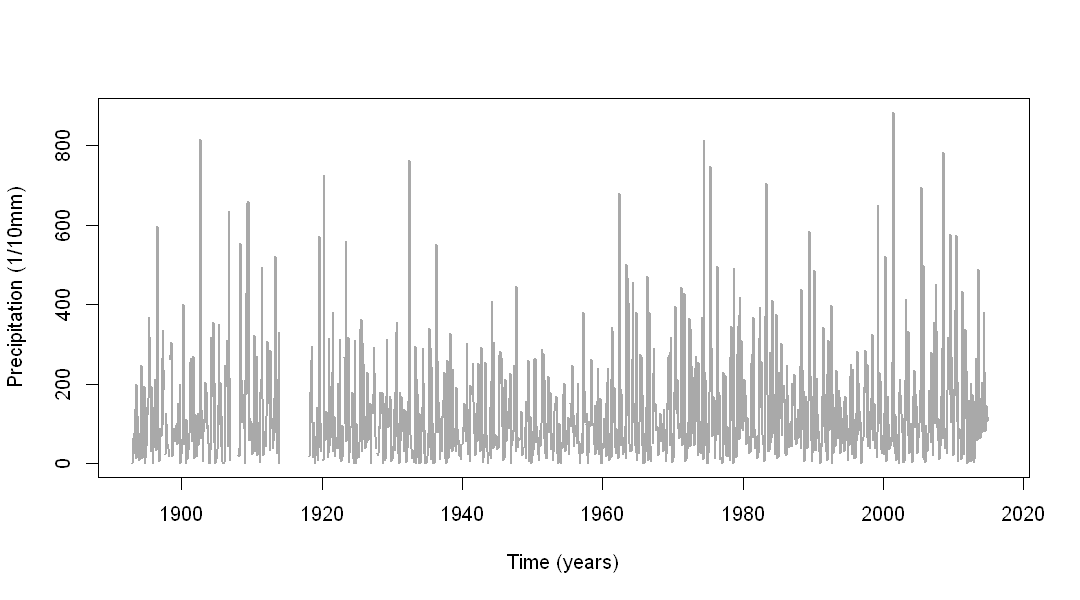

In [270]:
plot(maxTS, xlab = "Time (years)", col = "darkgrey", lwd=1.75, ylab = "Precipitation (1/10mm)", 
     #main=sprintf("%s \nObserved 24 Hour Max Rainfall \nfrom %i to 2012 by Monthly Max", stationName,firstYear),
     #ylim=c(0,1250)
    )

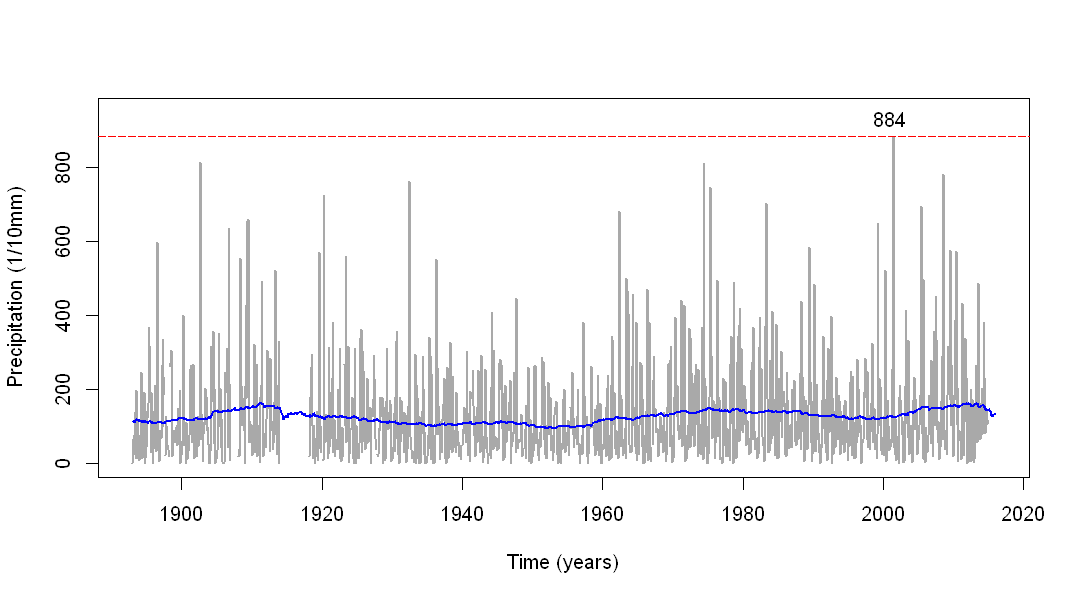

In [271]:
plot(maxTS, xlab = "Time (years)", col = "darkgrey", lwd=1.75, ylab = "Precipitation (1/10mm)", 
     #main=sprintf("%s \nObserved 24 Hour Max Rainfall \nfrom %i to 2012 by Monthly Max", stationName,firstYear),
     ylim=c(0,950))
abline(h=maxObs, col="red", lwd=.5, lty=5)
points(smoothTS, col=4, type="l", lwd=2)
text(data[which(data$Max.PRCP.==maxObs),"YEAR"],maxObs+50,
           sprintf("%i",maxObs))

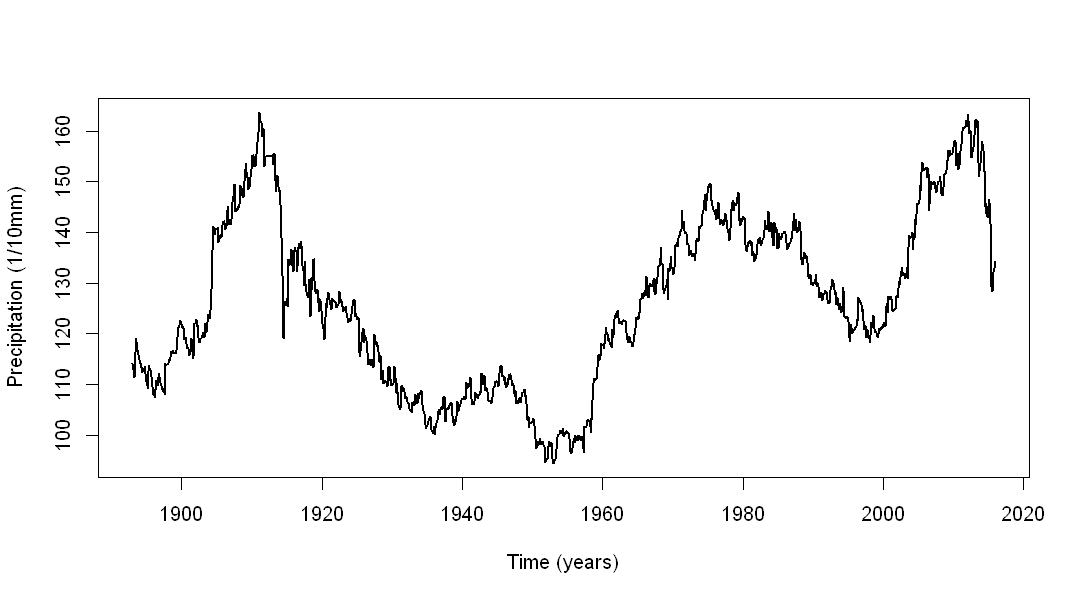

In [272]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)", col = 1
     #main="Smoothed 24 hour max rainfall from 1898 to 2014"
    )


In [273]:
smoothALL = runmean(data$Max.PRCP., length(data$Max.PRCP.)/2)

In [274]:
length(smoothALL)

[1] 1476

In [275]:
smoothALLTS = ts(smoothALL, start = firstYear, freq=12)

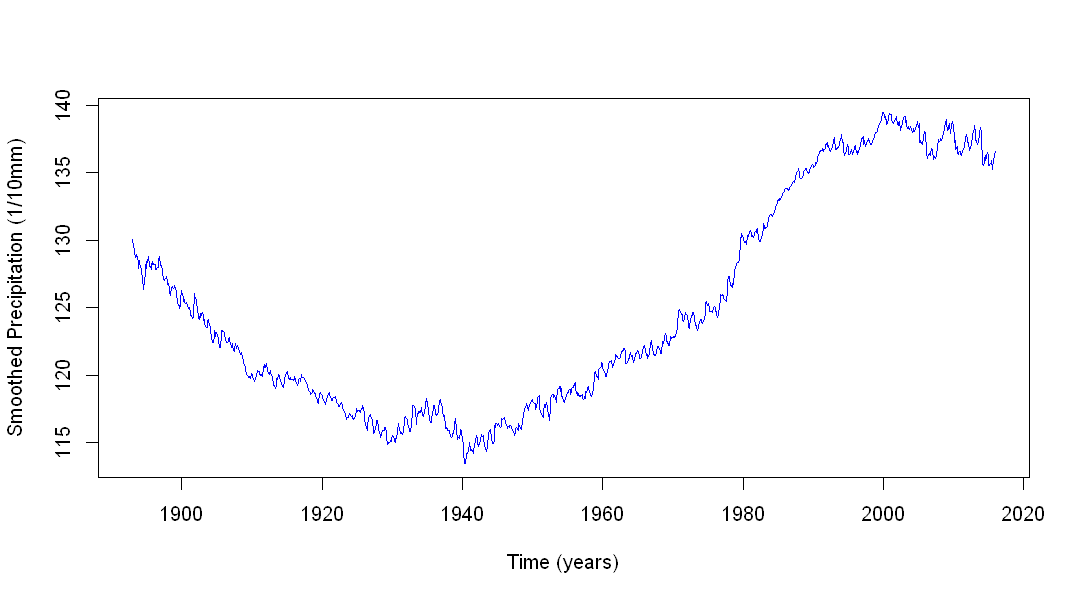

In [276]:
plot(smoothALLTS, type="l", col="blue", ylab="Smoothed Precipitation (1/10mm)", xlab="Time (years)")

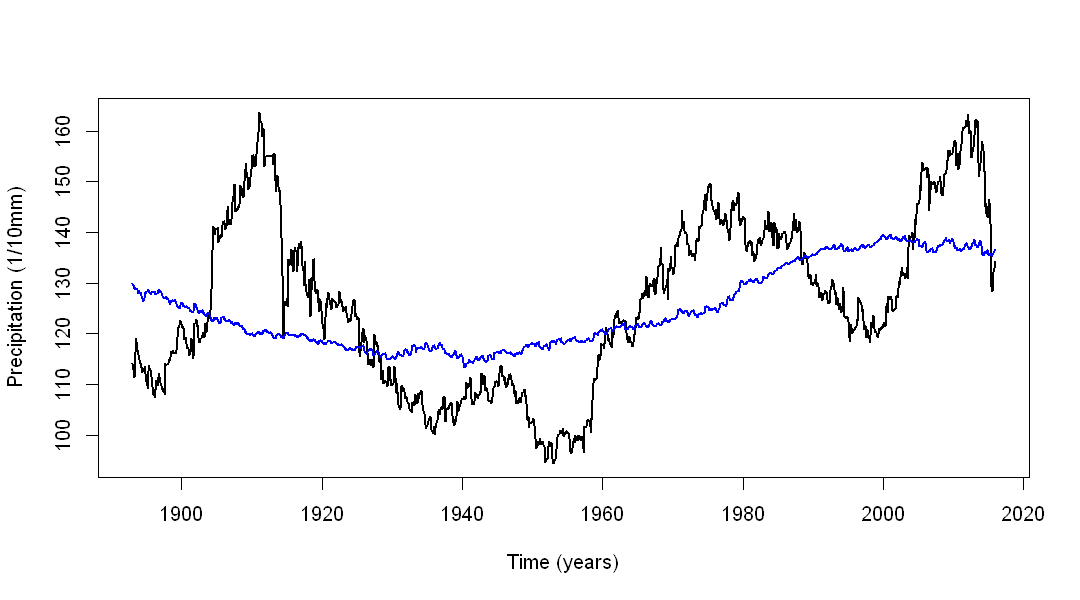

In [277]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)", col = 1
     #main="Smoothed 24 hour max rainfall from 1898 to 2014"
    )
lines(smoothALLTS, col=4, lwd=2)

### Change point detection for mean signal

In [278]:
require(changepoint)

Loading required package: changepoint
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Successfully loaded changepoint package version 2.2.1
 NOTE: Predefined penalty values have changed.  Previous penalty values with a postfix 1 i.e. SIC1 are now without i.e. SIC and previous penalties without a postfix i.e. SIC are now with a postfix 0 i.e. SIC0. See NEWS and help files for further details.


In [279]:
cpt.mean(smoothTS)

Class 'cpt' : Changepoint Object
       ~~   : S4 class containing 12 slots with names
              date version data.set cpttype method test.stat pen.type pen.value minseglen cpts ncpts.max param.est 

Created on  : Tue Sep 13 17:22:34 2016 

summary(.)  :
----------
Created Using changepoint version 2.2.1 
Changepoint type      : Change in mean 
Method of analysis    : AMOC 
Test Statistic  : Normal 
Type of penalty       : MBIC with value, 21.89127 
Minimum Segment Length : 1 
Maximum no. of cpts   : 1 
Changepoint Locations : 876 

In [281]:
cp=876

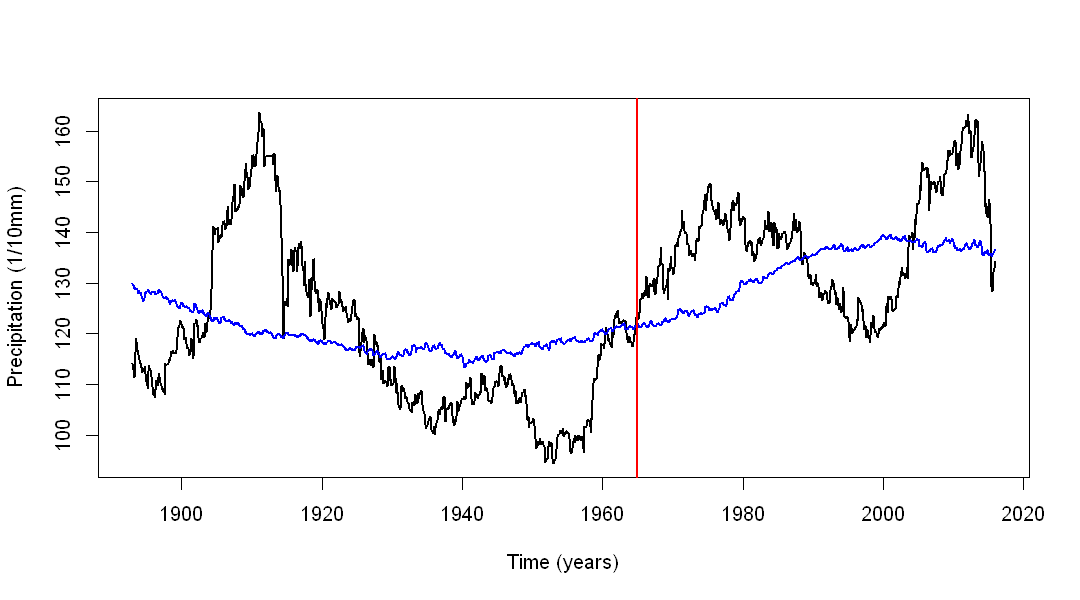

In [282]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)", col = 1
     #main="Smoothed 24 hour max rainfall from 1898 to 2014"
    )
lines(smoothALLTS, col=4, lwd=2)
abline(v=data[cp,],col=2,lwd=2)

In [283]:
data[cp,]

,STATION,STATION_NAME,YEAR,MONTH,Obs,Max.PRCP.
809,GHCND:USC00053546,GREELEY CO US,1965,12,30,76


In [284]:
cpYear = data[cp,"YEAR"]

In [285]:
smoothTS[cp]

[1] 127.3475

In [286]:
shapiro.test(smoothTS)


	Shapiro-Wilk normality test

data:  smoothTS
W = 0.97519, p-value = 2.877e-15


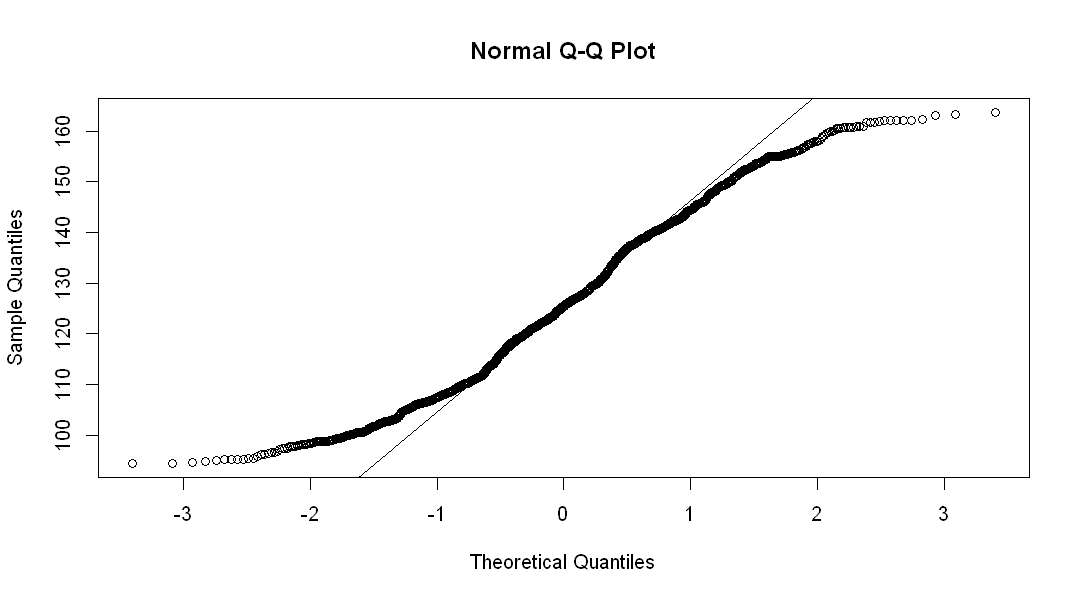

In [287]:
qqnorm(smoothTS);qqline(smoothTS)

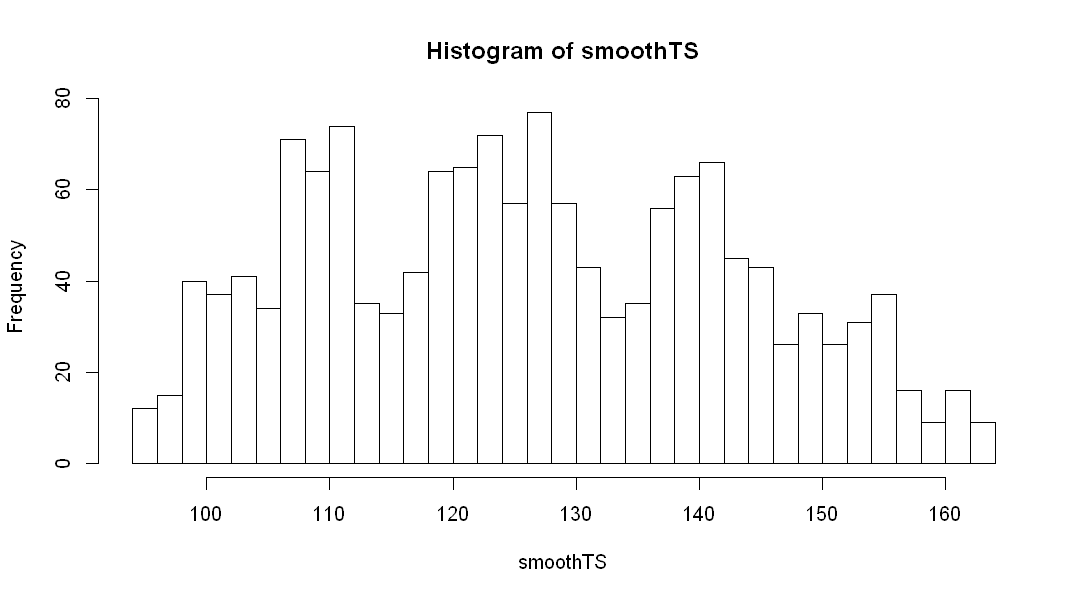

In [288]:
hist(smoothTS,breaks=40)

In [289]:
smoothTS[(cp-10):(cp+10)]

[1] 122.7712 123.9322 124.1525 124.3898 126.7966 126.9068 127.8305 127.8983
 [9] 126.9068 127.4492 127.3475 128.1441 128.4915 127.6695 131.2881 130.1271
[17] 129.6525 127.2627 127.3305 129.3305 129.9153

In [290]:
anotherTS = smoothTS

In [291]:
mean1sthalf = mean(smoothTS[1:cp])
mean2ndhalf = mean(smooth[(cp+1):length(smoothTS)])

In [292]:
anotherTS[1:cp] = mean1sthalf
anotherTS[(cp+1):length(smoothTS)] = mean2ndhalf

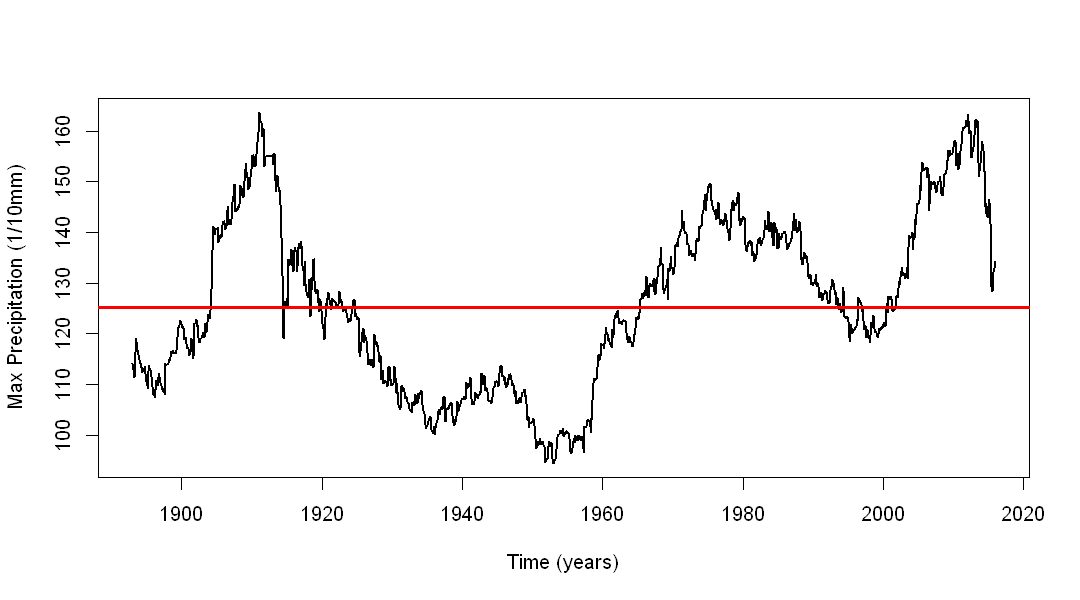

In [293]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Max Precipitation (1/10mm)", col = 1 #main="Smoothed 24 hour max rainfall from 1898 to 2012"
    )
    #points(rollLarge, type="l", col=4)
    #egend(0,200, c("300 window","", "900 window"), col=c(2,0,4), lty=c(1,0,1), bty="n")
    abline(h=mean(na.omit(data$Max.PRCP.)),col=2,lwd=3)

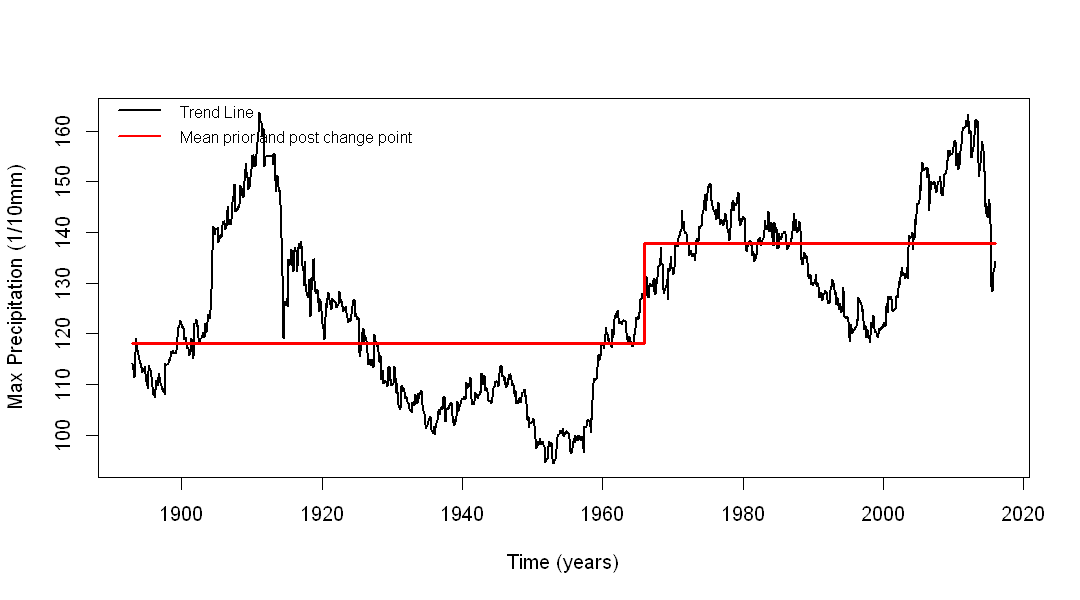

In [294]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Max Precipitation (1/10mm)", col = 1, #main="Smoothed 24 hour max rainfall from 1898 to 2012"
    )
    #points(rollLarge, type="l", col=4)
    #egend(0,200, c("300 window","", "900 window"), col=c(2,0,4), lty=c(1,0,1), bty="n")
    lines(anotherTS,col=2,lwd=3)
    legend("topleft",c("Trend Line","","Mean prior and post change point"), lty=c(1,0,1), lwd=c(2,0,2), col=c(1,0,2),
    bty="n", cex = .8, pt.cex=.8)

In [295]:
data["box"] = as.numeric(data$YEAR>=cpYear)

In [296]:
mean(na.omit(data[which(data$box == 0),"Max.PRCP."]))

[1] 116.6675

In [297]:
mean(na.omit(data[which(data$box == 1),"Max.PRCP."]))

[1] 136.5477

Box plots with noise from the event

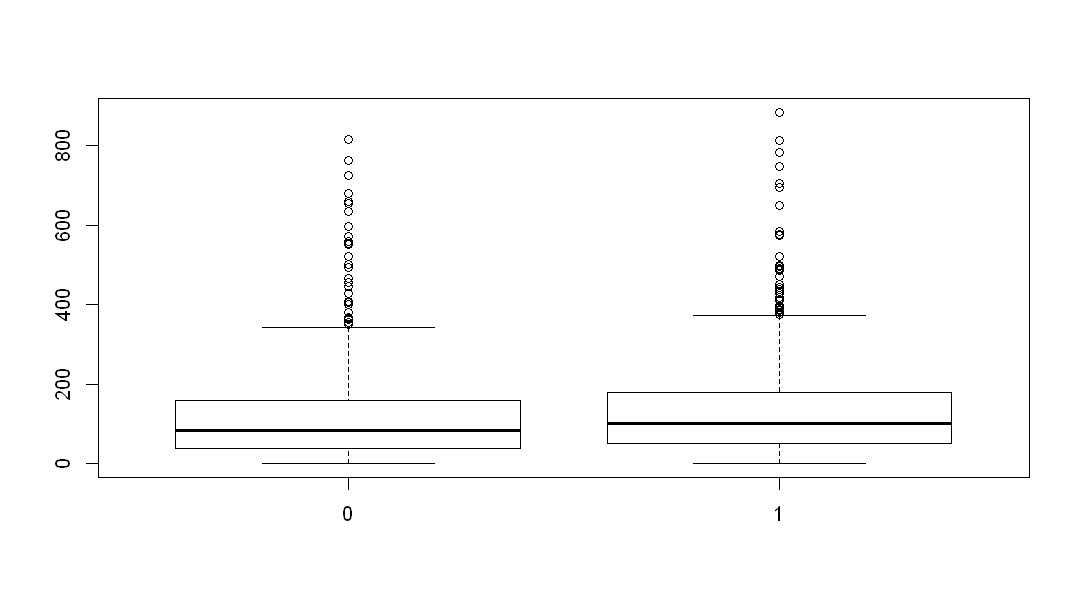

In [298]:
boxplot(data$Max.PRCP.~data$box)

A little less noise in the box plots by removing the event

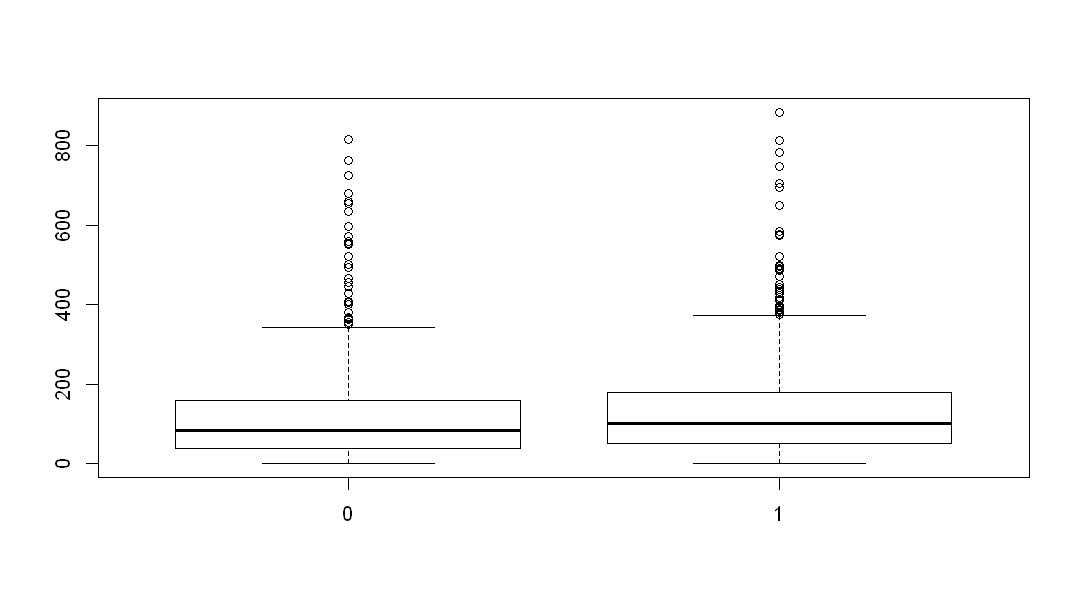

In [299]:
boxplot(data$Max.PRCP.~data$box)

In [300]:
indicator = c(rep(0,cp),rep(1,(length(smoothTS)-cp)))

In [301]:
meansBox = as.data.frame(cbind(smoothTS,indicator))

In [302]:
meansBoxSea = as.data.frame(cbind(smoothTS, rep(c(1,2,3,4,5,6,7,8,9,10,11,12),length(smoothTS)/12)))

In [303]:
names(meansBoxSea) = c("precipitation","month")

Now, can see the difference in the mean of the smoothed signals, however, given the actual variance of the data, the significance here is debatable - not to mention the independence assumption is not valid.

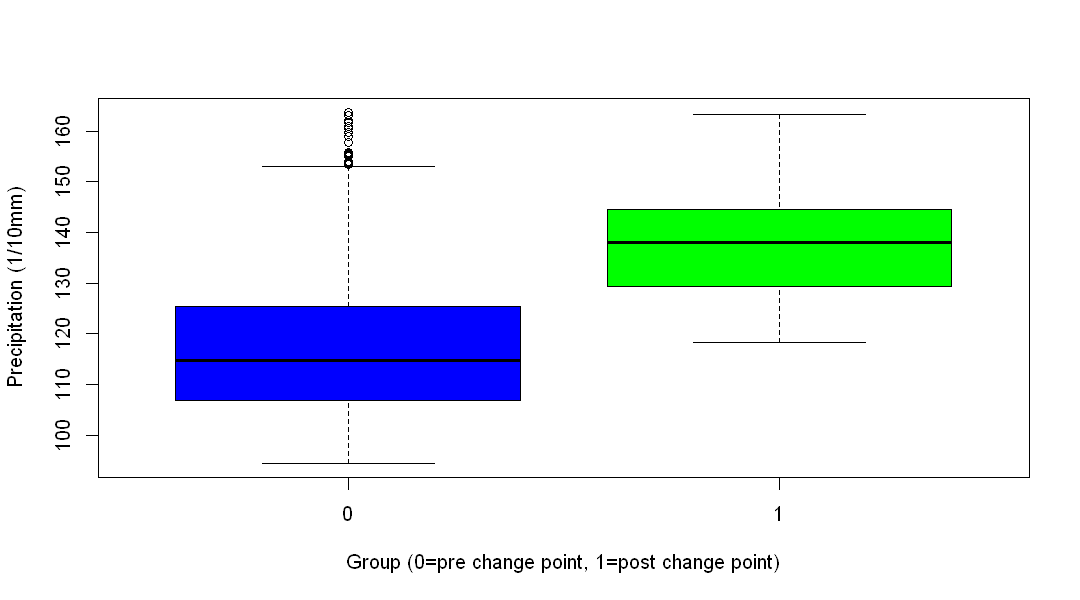

In [304]:
boxplot(meansBox$smoothTS ~ meansBox$indicator, xlab = "Group (0=pre change point, 1=post change point)",
       col = c("blue","green"), ylab = "Precipitation (1/10mm)")

#  Variances

In [305]:
vars1 = NULL
for(i in 1:(length(max_PRCP))){
    vars1 = c(vars1,var(na.omit(max_PRCP[,i])))
}
vars1TS = ts(vars1, start = firstYear)

In [306]:
vars1TS

Time Series:
Start = 1893 
End = 2005 
Frequency = 1 
  [1] 13851.307 13731.002 14497.373 14336.014 15403.441 16071.291 17298.263
  [8] 23600.971 23067.275 24034.730 20159.845 22117.565 22982.179 24370.766
 [15] 23116.366 23116.366 21240.810 15239.739 20578.830 20049.853 20019.606
 [22] 20537.607 18643.538 18651.816 16942.767 16021.006 15802.538 14019.619
 [29] 11400.982 10297.720 13500.456 11782.898 11878.085 11069.773 12843.016
 [36] 12653.386 13041.013 12803.088 11985.493 12272.890  9254.575  8973.705
 [43]  9655.983  9479.220  7816.538  8701.385  8221.079  8347.930  8756.656
 [50]  9089.495  8634.790  8405.968  7364.661  6645.836  6454.022  6501.312
 [57]  6691.520  6665.102  6196.930  6665.238  9346.375 12344.663 13955.738
 [64] 14305.686 15990.666 15143.323 14969.294 15641.933 16089.237 16838.337
 [71] 14964.997 12410.451 15364.307 18384.081 17826.026 17880.568 19635.221
 [78] 20548.344 20059.994 19203.090 19471.676 22894.975 19549.508 16432.639
 [85] 15426.453 14952.457 14018.04

In [307]:
rollSmall = ts(runmean(vars1TS,15),start=firstYear)
rollSmall2 = ts(runmean(vars1TS,30),start=firstYear)
rollSmall3 = ts(runmean(vars1TS,50),start=firstYear)

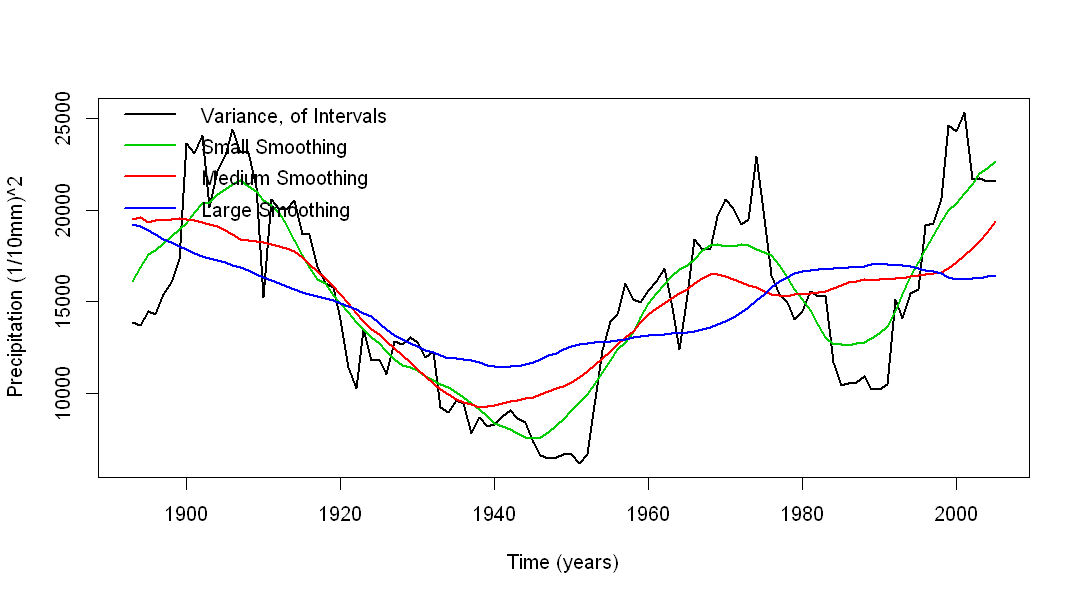

In [308]:
plot(vars1TS, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)^2", col = 1)
lines(rollSmall, col=3,lwd=2)
lines(rollSmall2, col=2,lwd=2)
lines(rollSmall3, col=4,lwd=2)
legend("topleft",c("Variance, of Intervals","","Small Smoothing", "","Medium Smoothing","","Large Smoothing"),
      col = c(1,0,3,0,2,0,4), lty = c(1,0,1,0,1,0,1), lwd=c(2,2,2,2), bty="n")

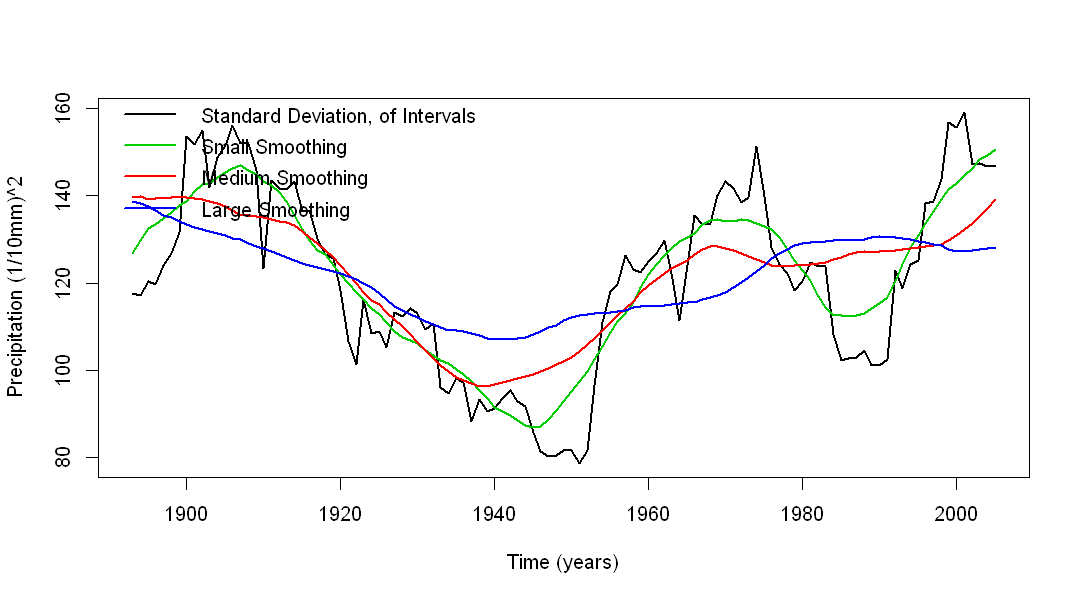

In [309]:
plot(sqrt(vars1TS), type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)^2", col = 1)
lines(sqrt(rollSmall), col=3,lwd=2)
lines(sqrt(rollSmall2), col=2,lwd=2)
lines(sqrt(rollSmall3), col=4,lwd=2)
legend("topleft",c("Standard Deviation, of Intervals","","Small Smoothing", "","Medium Smoothing","","Large Smoothing"),
      col = c(1,0,3,0,2,0,4), lty = c(1,0,1,0,1,0,1), lwd=c(2,2,2,2), bty="n")